# RoadMap 7 - NN Layers - Convolution, Pooling and Padding

    1.1.  torch.nn.Conv1d          - Applies a 1D convolution
    1.2.  torch.nn.Conv2d          - Applies a 2D convolution
    1.3.  torch.nn.ConvTranspose1d - Applies a 1D transposed convolutio
    1.4.  torch.nn.ConvTranspose2d - Applies a 2D transposed convolution
            
            
            
    2.1.  torch.nn.MaxPool1D           - Applies a 1D max pooling.
    2.2.  torch.nn.MaxPool2d           - Applies a 2D max pooling.
    2.3.  torch.nn.MaxUnpool1d         - Computes a partial inverse of MaxPool1d.
    2.4.  torch.nn.MaxUnpool2d         - Computes a partial inverse of MaxPool2d
    2.5.  torch.nn.AvgPool1D           - Applies a 1D avg pooling
    2.6.  torch.nn.AvgPool2d           - Applies a 2D average pooling
    2.7.  torch.nn.FractionalMaxPool2d - Applies a 2D fractional max pooling
    2.8.  torch.nn.LPPool1d            - Applies a 1D power-average pooling 
    2.9.  torch.nn.LPPool2d            - Applies a 2D power-average pooling
    2.10. torch.nn.AdaptiveMaxPool1d   - Applies a 1D adaptive max pooling
    2.11. torch.nn.AdaptiveMaxPool2d   - Applies a 2D adaptive max pooling
    2.12. torch.nn.AdaptiveAvgPool1d   - Applies a 1D adaptive average pooling
    2.13. torch.nn.AdaptiveAvgPool2d   - Applies a 2D adaptive average pooling
    
    
    3.1.  torch.nn.ReflectionPad1d - Pads the input tensor using the reflection of the input boundary.
    3.2.  torch.nn.ReflectionPad2d - Pads the input tensor using the reflection of the input boundary.
    3.3.  torch.nn.ReplicationPad1d - Pads the input tensor using replication of the input boundary.
    3.4.  torch.nn.ReplicationPad2d - Pads the input tensor using the replication of the input boundary.
    3.5.  torch.nn.ZeroPad2d - Pads the input tensor boundaries with zero.
    3.6.  torch.nn.ConstantPad1d - Pads the input tensor boundaries with a constant value.
    3.7.  torch.nn.ConstantPad2d - Pads the input tensor boundaries with a constant value.
    
    
    4.    All the above as FUNCTIONAL modules

In [58]:
import os
import sys
import torch
import numpy as np

In [59]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

torch.Size([1, 3, 576, 768])


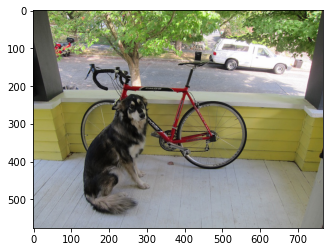

In [60]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

In [61]:
# FUNCTIONAL modules - Implementing each module as functions
import torch.nn.functional as F

## Extra Blog Resources

1. https://colah.github.io/posts/2014-07-Understanding-Convolutions/
    
2. https://www.machinecurve.com/index.php/2019/09/29/understanding-transposed-convolutions/

In [62]:
# 1D Convolutions

'''
1. nn.Conv1d - Applies a 1D convolution over an input signal composed of several input planes.
        - in_channels (int) – Number of channels in the input image
        - out_channels (int) – Number of channels produced by the convolution
        - kernel_size (int or tuple) – Size of the convolving kernel
        - stride (int or tuple, optional) – Stride of the convolution. Default: 1
        - padding (int or tuple, optional) – Zero-padding added to both sides of the input. Default: 0
        - dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1
        - groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1
        - bias (bool, optional) – If True, adds a learnable bias to the output. Default: True
'''

print("Module implementation")
m = nn.Conv1d(in_channels=3, out_channels=10, kernel_size=3, stride=2)
input_data = torch.randn(20, 3, 50) #3D input
output = m(input_data)
print("Output shape = ", output.size())
print("\n")

print("Functional implementation")
weight = torch.randn(10, 3, 3)  # kernel_size = (3, 3), out_channels = 10
output = F.conv1d(input_data, weight, bias=None, stride=2, padding=0, dilation=1, groups=1) 
print("Output shape = ", output.size())
print("\n")

Module implementation
Output shape =  torch.Size([20, 10, 24])


Functional implementation
Output shape =  torch.Size([20, 10, 24])




Module implementation
Output_shape =  torch.Size([1, 3, 287, 383])


Functional implementation
Output_shape =  torch.Size([1, 3, 287, 383])




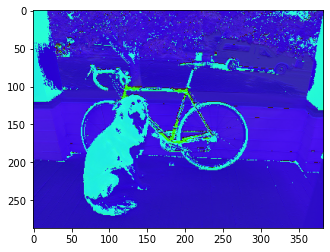

In [63]:
# 2D Convolutions

'''
2. nn.conv2d - Applies a 2D convolution over an input signal composed of several input planes.
        - in_channels (int) – Number of channels in the input image
        - out_channels (int) – Number of channels produced by the convolution
        - kernel_size (int or tuple) – Size of the convolving kernel
        - stride (int or tuple, optional) – Stride of the convolution. Default: 1
        - padding (int or tuple, optional) – Zero-padding added to both sides of the input. Default: 0
        - dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1
        - groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1
        - bias (bool, optional) – If True, adds a learnable bias to the output. Default: True
'''

print("Module implementation" )
m = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=2)
output = m(image_nchw)
print("Output_shape = ", output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)
print("\n")


print("Functional implementation")
weight = torch.randn(3, 3, 3, 3)  # kernel_size = (3, 3), out_channels = 3
output = F.conv2d(image_nchw, weight, bias=None, stride=2) 
print("Output_shape = ", output.size())
print("\n")


In [64]:
# 1D Transposed Convolution

'''
3. nn.ConvTranspose1d - Applies a 1D transposed convolution operator over an input image composed of several input planes.
        - in_channels (int) – Number of channels in the input image
        - out_channels (int) – Number of channels produced by the convolution
        - kernel_size (int or tuple) – Size of the convolving kernel
        - stride (int or tuple, optional) – Stride of the convolution. Default: 1
        - padding (int or tuple, optional) – kernel_size - 1 - padding zero-padding will be added to both sides of 
            the input. Default: 0
        - output_padding (int or tuple, optional) – Additional size added to one side of the output shape. Default: 0
        - groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1
        - bias (bool, optional) – If True, adds a learnable bias to the output. Default: True
        - dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1
'''

print("Module Implementation")
m = nn.ConvTranspose1d(in_channels=3, out_channels=10, kernel_size=3, stride=2)
input_data = torch.randn(20, 3, 50) #3D input
output = m(input_data)
print("Output shape = ", output.size())
print("\n")

print("Functional implementation")
weight = torch.randn(3, 10, 3)  # kernel_size = (3, 3), out_channels = 10 [Note: Transposed weights]
output = F.conv_transpose1d(input_data, weight, bias=None, stride=2, padding=0, dilation=1, groups=1) 
print("Output shape = ", output.size())
print("\n")

Module Implementation
Output shape =  torch.Size([20, 10, 101])


Functional implementation
Output shape =  torch.Size([20, 10, 101])




Module Implementation
Output shape =  torch.Size([1, 3, 1153, 1537])


Functional implementation
Output_shape =  torch.Size([1, 3, 1153, 1537])




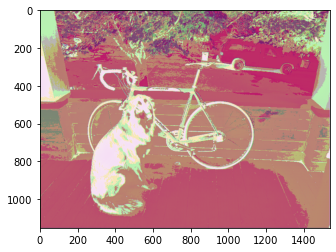

In [65]:
# 2D Transposed Convolutions

'''
4. nn.ConvTranspose2d - Applies a 2D transposed convolution operator over an input image composed of several input planes.
        - - in_channels (int) – Number of channels in the input image
        - out_channels (int) – Number of channels produced by the convolution
        - kernel_size (int or tuple) – Size of the convolving kernel
        - stride (int or tuple, optional) – Stride of the convolution. Default: 1
        - padding (int or tuple, optional) – Zero-padding added to both sides of the input. Default: 0
        - dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1
        - groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1
        - bias (bool, optional) – If True, adds a learnable bias to the output. Default: True
'''

print("Module Implementation")
m = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=3, stride=2)
output = m(image_nchw)
print("Output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)


print("Functional implementation")
weight = torch.randn(3, 3, 3, 3)  # kernel_size = (3, 3), out_channels = 3
output = F.conv_transpose2d(image_nchw, weight, bias=None, stride=2) 
print("Output_shape = ", output.size())
print("\n")

## Extra Blog Resources

1. https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

2. https://www.researchgate.net/figure/An-illustration-of-two-types-of-unpooling-operations-a-simply-replacing-each-entry-of_fig9_323470988

3. https://adventuresinmachinelearning.com/global-average-pooling-convolutional-neural-networks/

In [66]:
# Max Pooling - 1D

'''
5. nn.MaxPool1D - Applies a 1D max pooling over an input signal composed of several input planes.
        - kernel_size – the size of the window to take a max over
        - stride – the stride of the window. Default value is kernel_size
        - padding – implicit zero padding to be added on both sides
        - dilation – a parameter that controls the stride of elements in the window
        - return_indices – if True, will return the max indices along with the outputs. Useful when Unpooling later
        - ceil_mode – when True, will use ceil instead of floor to compute the output shape
'''

print("Module implementation")
m = nn.MaxPool1d(kernel_size=3, stride=2)
input_data = torch.randn(20, 16, 50)
output = m(input_data)
print("input_data shape = ", input_data.size())
print("output shape = ", output.size())
print("\n")

print("Functional implementation")
output = F.max_pool1d(input_data, kernel_size=3, stride=2)
print("output shape = ", output.size())
print("\n")

Module implementation
input_data shape =  torch.Size([20, 16, 50])
output shape =  torch.Size([20, 16, 24])


Functional implementation
output shape =  torch.Size([20, 16, 24])




Module implementation
torch.Size([1, 3, 287, 383])
Input image shape -  (768, 576)
Output image shape -  (383, 287)


Functional implementation
Input image shape -  (768, 576)
Output image shape -  (383, 287)




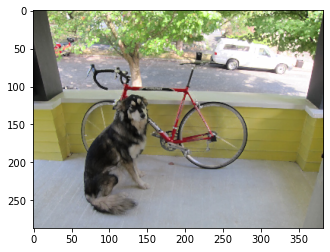

In [67]:
# Max Pooling - 2D

'''
6. nn.MaxPool2d - Applies a 2D max pooling over an input signal composed of several input planes.
        - kernel_size – the size of the window to take a max over
        - stride – the stride of the window. Default value is kernel_size
        - padding – implicit zero padding to be added on both sides
        - dilation – a parameter that controls the stride of elements in the window
        - return_indices – if True, will return the max indices along with the outputs. Useful when Unpooling later
        - ceil_mode – when True, will use ceil instead of floor to compute the output shape
'''

print("Module implementation")
m = nn.MaxPool2d(kernel_size=3, stride=2)
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)
print("\n")

print("Functional implementation")
output = F.max_pool2d(image_nchw, kernel_size=3, stride=2)
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
print("\n")


In [68]:
# Max Un-Pooling - 1D

'''
7. nn.MaxUnpool1d - Applies a 1D max pooling over an input signal composed of several input planes.
        - kernel_size (int or tuple) – Size of the max pooling window.
        - stride (int or tuple) – Stride of the max pooling window. It is set to kernel_size by default.
        - padding (int or tuple) – Padding that was added to the input
'''

print("Module implementation")
input_data = torch.randn(20, 16, 50)
pool = nn.MaxPool1d(kernel_size=2, stride=2, return_indices=True)
pooled_data, indices = pool(input_data)

unpool = nn.MaxUnpool1d(kernel_size=2, stride=2)
unpooled_data = unpool(pooled_data, indices)  #REQUIRES INDICES created from POOLING

print("input_data shape = ", input_data.size())
print("pooled data shape = ", pooled_data.size())
print("unpooled data shape = ", unpooled_data.size())
print("\n")


print("Functional implementation")
pooled_data, indices = F.max_pool1d(input_data, kernel_size=2, stride=2, return_indices=True)
unpooled_data = F.max_unpool1d(pooled_data, indices, kernel_size=2, stride=2)
print("input_data shape = ", input_data.size())
print("pooled data shape = ", pooled_data.size())
print("unpooled data shape = ", unpooled_data.size())
print("\n")

Module implementation
input_data shape =  torch.Size([20, 16, 50])
pooled data shape =  torch.Size([20, 16, 25])
unpooled data shape =  torch.Size([20, 16, 50])


Functional implementation
input_data shape =  torch.Size([20, 16, 50])
pooled data shape =  torch.Size([20, 16, 25])
unpooled data shape =  torch.Size([20, 16, 50])




In [69]:
# Max Un-Pooling - 2D

'''
8. nn.MaxUnpool2d -Computes a partial inverse of MaxPool2d
        - kernel_size (int or tuple) – Size of the max pooling window.
        - stride (int or tuple) – Stride of the max pooling window. It is set to kernel_size by default.
        - padding (int or tuple) – Padding that was added to the input
'''

print("Module implementation")
pool = nn.MaxPool2d(kernel_size=2, stride=2, return_indices=True)
pooled_data, indices = pool(image_nchw)

unpool = nn.MaxUnpool2d(kernel_size=2, stride=2)
unpooled_data = unpool(pooled_data, indices)  #REQUIRES INDICES created from POOLING

print("input_data shape = ", image_nchw.size())
print("pooled data shape = ", pooled_data.size())
print("unpooled data shape = ", unpooled_data.size())
print("\n")


print("Functional implementation")
pooled_data, indices = F.max_pool2d(image_nchw, kernel_size=2, stride=2, return_indices=True)
unpooled_data = F.max_unpool2d(pooled_data, indices, kernel_size=2, stride=2)
print("input_data shape = ", image_nchw.size())
print("pooled data shape = ", pooled_data.size())
print("unpooled data shape = ", unpooled_data.size())
print("\n")

Module implementation
input_data shape =  torch.Size([1, 3, 576, 768])
pooled data shape =  torch.Size([1, 3, 288, 384])
unpooled data shape =  torch.Size([1, 3, 576, 768])


Functional implementation
input_data shape =  torch.Size([1, 3, 576, 768])
pooled data shape =  torch.Size([1, 3, 288, 384])
unpooled data shape =  torch.Size([1, 3, 576, 768])




In [70]:
# Average Pooling - 1D

'''
9. nn.AvgPool1D - Applies a 1D avg pooling over an input signal composed of several input planes.
        - kernel_size – the size of the window to take a max over
        - stride – the stride of the window. Default value is kernel_size
        - padding – implicit zero padding to be added on both sides
        - dilation – a parameter that controls the stride of elements in the window
        - return_indices – if True, will return the max indices along with the outputs. Useful when Unpooling later
        - ceil_mode – when True, will use ceil instead of floor to compute the output shape
'''

print("Module Implementation")
m = nn.AvgPool1d(kernel_size=3, stride=2)
input_data = torch.randn(20, 16, 50)
output = m(input_data)

print("input_data shape = ", input_data.size())
print("output shape = ", output.size())
print("\n")

print("Functional implementation")
output = F.avg_pool1d(input_data, kernel_size=3, stride=2)
print("output shape = ", output.size())
print("\n")

Module Implementation
input_data shape =  torch.Size([20, 16, 50])
output shape =  torch.Size([20, 16, 24])


Functional implementation
output shape =  torch.Size([20, 16, 24])




Module implementation
torch.Size([1, 3, 287, 383])
Input image shape -  (768, 576)
Output image shape -  (383, 287)


Functional implementation
Input image shape -  (768, 576)
Output image shape -  (383, 287)




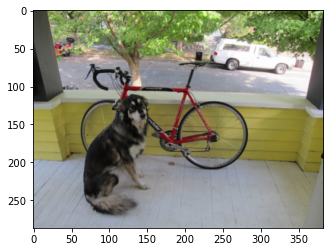

In [71]:
# Avg Pooling - 2D

'''
10. nn.AvgPool2d - Applies a 2D average pooling over an input signal composed of several input planes.
        - kernel_size – the size of the window to take a max over
        - stride – the stride of the window. Default value is kernel_size
        - padding – implicit zero padding to be added on both sides
        - dilation – a parameter that controls the stride of elements in the window
        - return_indices – if True, will return the max indices along with the outputs. Useful when Unpooling later
        - ceil_mode – when True, will use ceil instead of floor to compute the output shape
'''

print("Module implementation")
m = nn.AvgPool2d(kernel_size=3, stride=2)
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)
print("\n")

print("Functional implementation")
output = F.avg_pool2d(image_nchw, kernel_size=3, stride=2)
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
print("\n")

torch.Size([1, 3, 300, 300])
Input image shape -  (768, 576)
Output image shape -  (300, 300)


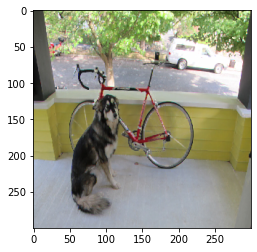

In [72]:
# Fractional Max Pooling 2D

'''
11. nn.FractionalMaxPool2d - Applies a 2D fractional max pooling over an input signal composed of several input planes.
        - kernel_size – the size of the window to take a max over. Can be a single number k 
            (for a square kernel of k x k) or a tuple (kh x kw)
        - output_size – the target output size of the image of the form oH x oW. 
            Can be a tuple (oH, oW) or a single number oH for a square image oH x oH
        - output_ratio – If one wants to have an output size as a ratio of the input size, this option can be given. 
            This has to be a number or tuple in the range (0, 1)
        - return_indices – if True, will return the indices along with the outputs. Useful to pass to nn.MaxUnpool2d(). 
            Default: False

'''

m = nn.FractionalMaxPool2d(kernel_size=3, output_size=300)
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)

## Extra Paper Resources

1. https://arxiv.org/abs/1311.1780

In [73]:
# Power average Pooling 1D

'''
12. nn.LPPool1d - Applies a 1D power-average pooling over an input signal composed of several input planes.
        - kernel_size – a single int, the size of the window
        - stride – a single int, the stride of the window. Default value is kernel_size
        - ceil_mode – when True, will use ceil instead of floor to compute the output shape

'''

print("Module implementation")
m = nn.LPPool1d(2, kernel_size=2, stride=2) # Power 2
input_data = torch.randn(20, 16, 50)
output = m(input_data)

print("Input Data shape = ", input_data.size())
print("Output Shape = ", output.size())
print("\n")

print("Functional implementation")
output = F.lp_pool1d(input_data, norm_type=2, kernel_size=2, stride=2)
print("output shape = ", output.size())
print("\n")

Module implementation
Input Data shape =  torch.Size([20, 16, 50])
Output Shape =  torch.Size([20, 16, 25])


Functional implementation
output shape =  torch.Size([20, 16, 25])




Module implementation
torch.Size([1, 3, 288, 384])
Input image shape -  (768, 576)
Output image shape -  (384, 288)


Functional implementation
Input image shape -  (768, 576)
Output image shape -  (383, 287)




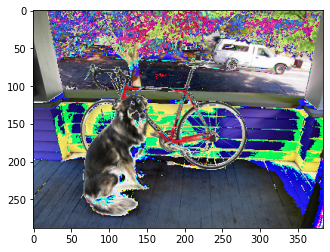

In [74]:
# Power average Pooling 2D

'''
13. nn.LPPool2d - Applies a 2D power-average pooling over an input signal composed of several input planes.
        - kernel_size – the size of the window
        - stride – the stride of the window. Default value is kernel_size
        - ceil_mode – when True, will use ceil instead of floor to compute the output shape
'''

print("Module implementation")
m = nn.LPPool2d(2, kernel_size=2, stride=2) # Power 2
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)
print("\n")

print("Functional implementation")
output = F.lp_pool2d(image_nchw, norm_type=2, kernel_size=3, stride=2)
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
print("\n")

In [75]:
# Adaptive max pooling 1D

'''
14. nn.AdaptiveMaxPool1d - Applies a 1D adaptive max pooling over an input signal composed of several input planes.
        - output_size – the target output size H
        - return_indices – if True, will return the indices along with the outputs. 
            Useful to pass to nn.MaxUnpool1d. Default: False

'''
print("Module implementation")
m = nn.AdaptiveMaxPool1d(5)
input_data = torch.randn(1, 64, 8)
output = m(input_data)

print("Input Data shape = ", input_data.size())
print("Output Shape = ", output.size())
print("\n")

print("Functional implementation")
output = F.adaptive_max_pool1d(input_data, 5)
print("output shape = ", output.size())
print("\n")

Module implementation
Input Data shape =  torch.Size([1, 64, 8])
Output Shape =  torch.Size([1, 64, 5])


Functional implementation
output shape =  torch.Size([1, 64, 5])




Module implementation
torch.Size([1, 3, 300, 300])
Input image shape -  (768, 576)
Output image shape -  (300, 300)


Functional implementation
Input image shape -  (768, 576)
Output image shape -  (300, 300)




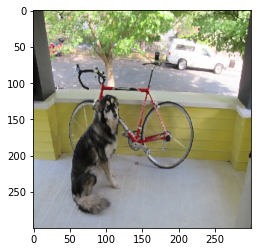

In [76]:
# Adaptive max pooling 2D

'''
15. nn.AdaptiveMaxPool2d - Applies a 2D adaptive max pooling over an input signal composed of several input planes.
        - output_size – the target output size of the image of the form H x W. Can be a tuple (H, W) or 
            a single H for a square image H x H. H and W can be either a int, 
            or None which means the size will be the same as that of the input.
        - return_indices – if True, will return the indices along with the outputs. Useful to pass to nn.MaxUnpool2d. 
            Default: False

'''

print("Module implementation")
m = nn.AdaptiveMaxPool2d(output_size=(300,300))
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)
print("\n")


print("Functional implementation")
output = F.adaptive_max_pool2d(image_nchw, 300)
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
print("\n")

In [77]:
# Adaptive average pooling 1D

'''
16. nn.AdaptiveAvgPool1d - Applies a 1D adaptive average pooling over an input signal composed of several input planes.
        - output_size – the target output size H
        - return_indices – if True, will return the indices along with the outputs. 
            Useful to pass to nn.MaxUnpool1d. Default: False

'''

print("Module implementation")
m = nn.AdaptiveAvgPool1d(5)
input_data = torch.randn(1, 64, 8)
output = m(input_data)

print("Input Data shape = ", input_data.size())
print("Output Shape = ", output.size())
print("\n")

print("Functional implementation")
output = F.adaptive_avg_pool1d(input_data, 5)
print("output shape = ", output.size())
print("\n")

Module implementation
Input Data shape =  torch.Size([1, 64, 8])
Output Shape =  torch.Size([1, 64, 5])


Functional implementation
output shape =  torch.Size([1, 64, 5])




Module implementation
torch.Size([1, 3, 300, 300])
Input image shape -  (768, 576)
Output image shape -  (300, 300)


Functional implementation
Input image shape -  (768, 576)
Output image shape -  (300, 300)




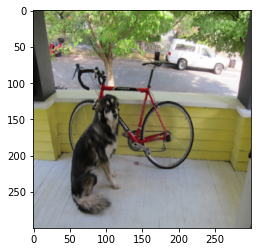

In [78]:
# Adaptive average pooling 2D

'''
17. nn.AdaptiveAvgPool2d - Applies a 2D adaptive average pooling over an input signal composed of several input planes.
        - output_size – the target output size of the image of the form H x W. Can be a tuple (H, W) or 
            a single H for a square image H x H. H and W can be either a int, 
            or None which means the size will be the same as that of the input.
        - return_indices – if True, will return the indices along with the outputs. Useful to pass to nn.MaxUnpool2d. 
            Default: False

'''

print("Module implementation")
m = nn.AdaptiveAvgPool2d(output_size=(300,300)) 
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)
print("\n")



print("Functional implementation")
output = F.adaptive_avg_pool2d(image_nchw, 300)
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
print("\n")


In [79]:
# Reflection pad 1D

'''
18. nn.ReflectionPad1d - Pads the input tensor using the reflection of the input boundary.
        - padding (int, tuple) – the size of the padding. If is int, uses the same padding in all boundaries. 
            If a 2-tuple, uses (paddingLeft, paddingRight)
'''

input_data = torch.randn(1, 64, 8)
m = nn.ReflectionPad1d(2)
output = m(input_data)

print("Input Data shape = ", input_data.size())
print("Output Shape = ", output.size())

Input Data shape =  torch.Size([1, 64, 8])
Output Shape =  torch.Size([1, 64, 12])


torch.Size([1, 3, 676, 868])
Input image shape -  (768, 576)
Output image shape -  (868, 676)


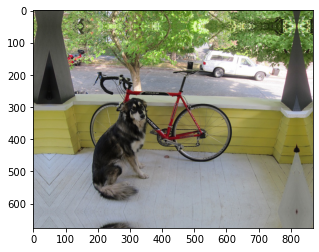

In [80]:
# Reflection pad 2D

'''
19. nn.ReflectionPad2d - Pads the input tensor using the reflection of the input boundary.
        - padding (int, tuple) – the size of the padding. If is int, uses the same padding in all boundaries. 
            If a 4-tuple, uses (paddingLeft, paddingRight, paddingTop, paddingBottom)
'''

m = nn.ReflectionPad2d(50)
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)

In [81]:
# Replication pad 1D

'''
20. nn.ReplicationPad1d - Pads the input tensor using replication of the input boundary.
        - padding (int, tuple) – the size of the padding. If is int, uses the same padding in all boundaries. 
            If a 2-tuple, uses (paddingLeft, paddingRight)
'''

input_data = torch.randn(1, 64, 8)
m = nn.ReplicationPad1d(2)
output = m(input_data)

print("Input Data shape = ", input_data.size())
print("Output Shape = ", output.size())

Input Data shape =  torch.Size([1, 64, 8])
Output Shape =  torch.Size([1, 64, 12])


torch.Size([1, 3, 676, 868])
Input image shape -  (768, 576)
Output image shape -  (868, 676)


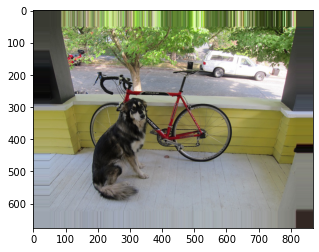

In [82]:
# Replication pad 2D

'''
21. nn.ReplicationPad2d - Pads the input tensor using the replication of the input boundary.
        - padding (int, tuple) – the size of the padding. If is int, uses the same padding in all boundaries. 
            If a 4-tuple, uses (paddingLeft, paddingRight, paddingTop, paddingBottom)
'''

m = nn.ReplicationPad2d(50)
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)

torch.Size([1, 3, 676, 868])
Input image shape -  (768, 576)
Output image shape -  (868, 676)


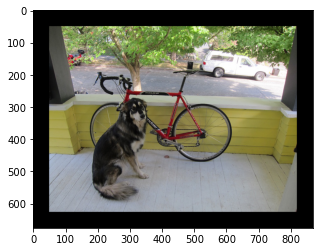

In [83]:
# Zero Padding 2D

'''
22. nn.ZeroPad2d - Pads the input tensor boundaries with zero.
        - padding (int, tuple) – the size of the padding. If is int, uses the same padding in all boundaries. 
            If a 4-tuple, uses (paddingLeft, paddingRight, paddingTop, paddingBottom)
'''

m = nn.ZeroPad2d(50)
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)

In [84]:
# Constant Padding 1D

'''
23. nn.ConstantPad1d - Pads the input tensor boundaries with a constant value.
        - padding (int, tuple) – the size of the padding. If is int, uses the same padding in all boundaries. 
            If a 2-tuple, uses (paddingLeft, paddingRight)
        - value
'''

input_data = torch.randn(1, 64, 8)
m = nn.ConstantPad1d(10, 3.5)
output = m(input_data)

print("Input Data shape = ", input_data.size())
print("Output Shape = ", output.size())

Input Data shape =  torch.Size([1, 64, 8])
Output Shape =  torch.Size([1, 64, 28])


torch.Size([1, 3, 676, 868])
Input image shape -  (768, 576)
Output image shape -  (868, 676)


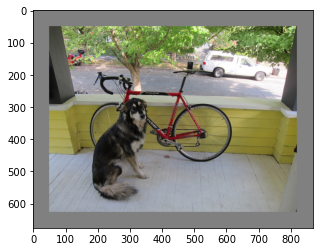

In [85]:
# Constant Padding 2D

'''
24. nn.ConstantPad2d - Pads the input tensor boundaries with a constant value.
        - padding (int, tuple) – the size of the padding. If is int, uses the same padding in all boundaries. 
            If a 4-tuple, uses (paddingLeft, paddingRight, paddingTop, paddingBottom)
'''

m = nn.ConstantPad2d(50, 128)
output = m(image_nchw)
print(output.size())

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
print("Input image shape - ", image_pil.size)
print("Output image shape - ", output_pil.size)
plt.imshow(output_pil)

# Goals

### 1. Experiment with different parameters of convolution layer

# Table of contents


## [Install Monk](#0)


## [Parameter - Number of filter](#1) 


## [Parameter - Kernel Size](#2)


## [Parameter - Stride](#3)


## [Parameter - Padding](#4) 


## [Parameter - Grouping](#5)


## [Parameter - Dilation](#6)

<a id='0'></a>
# Install Monk

## Install Monk Manually
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

In [ ]:
! git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
! cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

In [ ]:
! pip install networkx==1.5 matplotlib==2.1.1

## Visualization functions
   - Can be ignored

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np


def showFiltersWithKernels(list_of_files, col=10, wSize=5, hSize=5, mypath='.'):   
    
    from matplotlib import pyplot as plt

    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    
    plt.ion();
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = number_of_files / col
    if (number_of_files % col != 0):
        row += 1
    new_list = [];
    for i in range(len(list_of_files)//2):
        new_list.append("tmp/test" + str(i) + ".jpg")
        new_list.append("tmp/test_filter" + str(i) + ".jpg")
    
    for i in range(len(new_list)):
        a=fig.add_subplot(row, col, i + 1)
        if(i%2 == 0):
            a.set_title('feature_' + str(i//2+1));
        else:
            a.set_title('kernel_' + str(i//2+1));
        image = imread(mypath + '/' + new_list[i])
        imshow(image, cmap='Greys_r')
        axis('off')
        


        
        
        
def showFilters(list_of_files, col=10, wSize=5, hSize=5, mypath='.'):

    from matplotlib import pyplot as plt

    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    
    plt.ion();
    
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = number_of_files / col
    if (number_of_files % col != 0):
        row += 1
    new_list = [];
    for i in range(len(list_of_files)//2):
        new_list.append("tmp/test" + str(i) + ".jpg")
        
    for i in range(len(new_list)):
        a=fig.add_subplot(row, col, i + 1)
        image = imread(mypath + '/' + new_list[i])
        imshow(image, cmap='Greys_r')
        axis('off')

In [ ]:
import os
import sys
sys.path.append("monk_v1")

## Import Monk

In [ ]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype

In [ ]:
# Create a sample project
gtf = prototype(verbose=0);
gtf.Prototype("Project", "Study-Convolutions");

<a id='1'></a>
# Number of convolution filters

## Study Material

 - Number of filters = Number of features learnt by the convolution layers
 
 
 - As per the answer here https://www.quora.com/What-is-meant-by-feature-maps-in-convolutional-neural-networks - "The feature map is the output of one filter applied to the previous layer. A given filter is drawn across the entire previous layer, moved one pixel at a time."
 

 - This answer from https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/ mentions how generally number of filters is increased with convolutions placed deeper in network - "Generally, you want to increase the number of filters as you move through the layers in the network, as your spatial length/width decreases"
 
 
 - Another blog - https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7 mentions the same - "By convention the number of channels generally increase or stay the same while we progress through layers in our convolutional neural net architecture"


 - As per an answer at https://stats.stackexchange.com/questions/196646/what-is-the-significance-of-the-number-of-convolution-filters-in-a-convolutional - "I usually like to think of filters as feature detectors. Although it depends on the problem domain, the significance # of feature detectors intuitively is the number of features (like edges, lines, object parts etc...) that the network can potentially learn."
 
 
 - Another answer from https://www.researchgate.net/post/How_to_fix_the_no_of_filters_in_convolutional_neural_network - "Setting the numbers of filters in a CNN (Convolutional Neural Network) can be seen as largely heuristic, just like other CNN parameters such as appropriate network depth, size of convolution filters, size of pooling windows, learning rate, the number of hidden neurons to implement in the classifier layer, etc. However, I would suggest that relative to the computing power available and the complexity of the task, the number of filters should be as large as possible. "
 
 
 - No right number to set as number of filters, more filters, take more space on machine, but improve the possibility of more features to be learnt. 

In [ ]:
# Weights are randomly generated hence different output at every run. 
# When a network is trained, these randly set weights are trained
# The right weights result in best features to be learnt


# Simple Convolution
output = gtf.study_convolution_filters("test.jpg", num_filters=4);


# Display
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")

%matplotlib inline
showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Interactive demo

### Number of filters

In [ ]:
sl1 = widgets.IntSlider(value=4, min=4, max=24, step=4);

def f(filters):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_convolution_filters("test.jpg", num_filters=filters);
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    
    %matplotlib inline
    showFilters(list_of_files, col=4, wSize=20, hSize=20)
    #######################################################################
    
    
interact(f, filters=sl1);

# Size of filter kernel

## Study Material

  - The mxn matrix used to convolute with the input to generate the filters
  
  
  - As per the comparison mentioned here https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363
      
      - Smaller Filter Sizes 	
        - It has a smaller receptive field as it looks at very few pixels at once. 	
        - Highly local features extracted without much image overview. 	
        - Therefore captures smaller, complex features in the image. 	
        - Amount of information extracted will be vast, maybe useful in later layers. 	
        - Slow reduction in the image dimension can make the network deep 	
        - Better weight sharing 	
        - In an extreme scenario, using a 1x1 convolution is like treating each pixel as a useful feature. 	

      - Larger Filter Sizes
        - Larger receptive field per layer.
        - Quite generic features extracted spread across the image.
        - Therefore captures the basic components in the image.
        - Amount of information extracted are considerably lesser.
        - Fast reduction in the image dimension makes the network shallow
        - Poorer weight sharing
        - Using a image sized filter is equivalent to a fully connected layer.
     
     
   - According to the answer here https://www.researchgate.net/post/How_do_we_choose_the_filters_for_the_convolutional_layer_of_a_Convolution_Neural_Network_CNN - "for a image recognition problem, if you think that a big amount of pixels are necessary for the network to recognize the object you will use large filters (as 11x11 or 9x9). If you think what differentiates objects are some small and local features you should use small filters (3x3 or 5x5)."
   

In [ ]:
# Weights are randomly generated hence different output at every run. 
# When a network is trained, these randly set weights are trained
# The right weights result in best features to be learnt

# Simple Convolution
output = gtf.study_convolution_kernels("test.jpg", kernel_size=5);


# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Size of the kernel

In [ ]:
sl1 = widgets.IntSlider(value=1, min=1, max=25, step=2);

def f(size):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_convolution_kernels("test.jpg", kernel_size=size);
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, size=sl1);

# Kernel Stride

## Study Material

  - As per the blog https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/ - "Stride controls how the filter convolves around the input volume."
   
   
   - This article https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148 states - "Stride is the number of pixels shifts over the input matrix. When the stride is 1 then we move the filters to 1 pixel at a time. When the stride is 2 then we move the filters to 2 pixels at a time and so on."
   
   
   - A comprehensive understanding of stride is present in
   
     - "The filter is moved across the image left to right, top to bottom, with a one-pixel column change on the horizontal movements, then a one-pixel row change on the vertical movements."

     - "The default stride or strides in two dimensions is (1,1) for the height and the width movement, performed when needed. And this default works well in most cases."
     
     - The stride can be changed to (2,2). This has the effect of moving the filter two pixels right for each horizontal movement of the filter and two pixels down for each vertical movement of the filter when creating the feature map."
     
     
   - Strides can have a downsampling effect on images

In [ ]:
# Weights are randomly generated hence different output at every run. 
# When a network is trained, these randly set weights are trained
# The right weights result in best features to be learnt

# Simple Convolution
output = gtf.study_convolution_stride("test.jpg", stride=2);
print("Stride of 2 downsamples image by half")
print("")

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Stride steps

In [ ]:
sl1 = widgets.IntSlider(value=1, min=1, max=5, step=1);

def f(stride):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_convolution_stride("test.jpg", stride=stride);
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, stride=sl1);

# Image padding

## Study Material

  - https://www.geeksforgeeks.org/cnn-introduction-to-padding/ defines Padding as simply a process of adding layers of zeros to our input images
  
 
  - As per the blog here https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/ 
      
      - Padding solves the border exffect problem. 
      - The pixels on the edge of the input are only ever exposed to the edge of the filter. 
      - By starting the filter outside the frame of the image, it gives the pixels on the border of the image more of an opportunity for interacting with the filter, more of an opportunity for features to be detected by the filter, and in turn, an output feature map that has the same shape as the input image.
      
      
  - As per the article here https://medium.com/@ayeshmanthaperera/what-is-padding-in-cnns-71b21fb0dd7
      - Convolution involves two problems - Shrinking outputs & Loosing information on corners of the image
      - And both are solved using padding
 
  
  - Helps to remove inconsistencies with data shapes in hidden layers
      

In [ ]:
# Weights are randomly generated hence different output at every run. 
# When a network is trained, these randly set weights are trained
# The right weights result in best features to be learnt

# Simple Convolution
output = gtf.study_convolution_padding("test.jpg", padding=0);
print("Padding of 0 (No-padding basically) results in inconsistent int output shapes with a kernel of size 5")
print("")

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Stride steps

In [ ]:
sl1 = widgets.IntSlider(value=1, min=1, max=10, step=1);

def f(padding):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_convolution_padding("test.jpg", padding=padding);
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, padding=sl1);

# Grouped convolution

## Study Material

  - Blog here https://towardsdatascience.com/grouped-convolutions-convolutions-in-parallel-3b8cc847e851 mentions 
    - "Grouped convolutions were used in Alexnet so that a deep neural network can be trained on less powerful GPUs with smaller RAM available at that time."
    - With grouped convolutions, we can build networks as wide as we want. Take one modular block of filter group and replicate them.
    - 
    

  - According to the article https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215 here - "In grouped convolution, the filters are separated into different groups. Each group is responsible for a conventional 2D convolutions with certain depth." 

In [ ]:
# Weights are randomly generated hence different output at every run. 
# When a network is trained, these randly set weights are trained
# The right weights result in best features to be learnt

# Simple Convolution
output = gtf.study_convolution_grouping("test.jpg", groups=5);
print("Input features % groups == 0");
print("");

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFilters(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Stride steps

In [ ]:
sl1 = widgets.IntSlider(value=1, min=1, max=10, step=1);

def f(groups):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_convolution_grouping("test.jpg", groups=groups);
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFilters(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, groups=sl1);

# Dilated convolution

## Study Material

  - As per the blog here https://towardsdatascience.com/review-dilated-convolution-semantic-segmentation-9d5a5bd768f5
    - The idea of Dilated Convolution is come from the wavelet decomposition. 
    - It is also called “atrous convolution”, “algorithme à trous” and “hole algorithm”.
    - With dilation the receptive field is larger compared with the standard one.
  
  
  
  - An answer here https://ai-pool.com/d/what-is-dilated-convolution- mentions
    - Dilated or atrous convolution is the same convolution, only with pixel skipping.
    - If you remember how regular convolution works, then dilated convolution skips pixels with 2 diraction: width and hight and as a result it takes much bigger part of the image for every step of the convolution. 
    - In addition to the benefits you already mentioned such as larger receptive field, efficient computation and lesser memory consumption, the dilated causal convolutions also has the following benefits:
      - it preserves the resolution/dimensions of data at the output layer. This is because the layers are dilated instead of pooling, hence the name dilated causal convolutions.
      - it maintains the ordering of data. For example, in 1D dilated causal convolutions when the prediction of output depends on previous inputs then the structure of convolution helps in maintaining the ordering of data.
  
    
  
      

In [ ]:
# Weights are randomly generated hence different output at every run. 
# When a network is trained, these randly set weights are trained
# The right weights result in best features to be learnt

# Simple Convolution
output = gtf.study_convolution_dilation("test.jpg", factor=3);
print("");

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Stride steps

In [ ]:
sl1 = widgets.IntSlider(value=1, min=1, max=10, step=1);

def f(factor):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_convolution_dilation("test.jpg", factor=factor);
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFiltersWithKernels(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, factor=sl1);

# Goals Completed

### Experiment with different parameters of convolution layer

# Goals

### 1. Experiment with different parameters of pooling layer

# Table of contents


## [Install Monk](#0)


## [Parameter - Type of Pooling](#1)


## [Parameter - Kernel Size](#2)


## [Parameter - Stride](#3)


## [Parameter - Padding](#4) 


## [Parameter - Dilation](#5)

## Visualization functions
   - Can be ignored

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np


def showFiltersWithKernels(list_of_files, col=10, wSize=5, hSize=5, mypath='.'):   
    
    from matplotlib import pyplot as plt

    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    
    plt.ion();
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = number_of_files / col
    if (number_of_files % col != 0):
        row += 1
    new_list = [];
    for i in range(len(list_of_files)//2):
        new_list.append("tmp/test" + str(i) + ".jpg")
        new_list.append("tmp/test_filter" + str(i) + ".jpg")
    
    for i in range(len(new_list)):
        a=fig.add_subplot(row, col, i + 1)
        if(i%2 == 0):
            a.set_title('feature_' + str(i//2+1));
        else:
            a.set_title('kernel_' + str(i//2+1));
        image = imread(mypath + '/' + new_list[i])
        imshow(image, cmap='Greys_r')
        axis('off')
        


        
        
        
def showFilters(list_of_files, col=10, wSize=5, hSize=5, mypath='.'):

    from matplotlib import pyplot as plt

    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    
    plt.ion();
    
    fig = figure(figsize=(wSize, hSize))
    number_of_files = len(list_of_files)
    row = number_of_files / col
    if (number_of_files % col != 0):
        row += 1
    new_list = [];
    for i in range(len(list_of_files)//2):
        new_list.append("tmp/test" + str(i) + ".jpg")
        
    for i in range(len(new_list)):
        a=fig.add_subplot(row, col, i + 1)
        image = imread(mypath + '/' + new_list[i])
        imshow(image, cmap='Greys_r')
        axis('off')


In [ ]:
import os
import sys
sys.path.append("monk_v1")

In [ ]:
## Import Monk

In [ ]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype

In [ ]:
# Create a sample project
gtf = prototype(verbose=0);
gtf.Prototype("Project", "Study-Pooling");

# Max Pooling vs Avg Pooling

## Study Material

  - As stated in https://computersciencewiki.org/index.php/Max-pooling_/_Pooling - "Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned." 
    
  - As described here https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/ - "Average pooling involves calculating the average for each patch of the feature map."
  
  - This blog - https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9 - on medium tells what difference lies between average and max pooling and when to use what
      - "Average pooling method smooths out the image and hence the sharp features may not be identified when this pooling method is used."
      - "Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image."

In [ ]:
# kernel_size=2, stride=None, padding=0, dilation=1

In [ ]:
# Pooling
output = gtf.study_pooling_type("test.jpg", type="avg");
print("");

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFilters(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Toggle type of pooling

In [ ]:
sl1 = widgets.Dropdown(options=['max', 'avg'], value='max')



def f(factor):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_pooling_type("test.jpg", type=factor);
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFilters(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, factor=sl1);

# Effect of kernel size on pooling

## Study Material

  - As per the answers in https://stats.stackexchange.com/questions/296679/what-does-kernel-size-mean/339265 - "The kernel size here refers to the widthxheight of the filter mask."
  
  - Larger kernel sizes usually tend to higher feature loss. As per answers here https://www.quora.com/Are-maxpooling-layer-kernel-sizes-in-CNNs-generally-smaller-than-convolutional-layer-kernel-sizes-Why - "If the kernel of the max pooling layer is too high you are throwing away too much valuable information." 
    

In [ ]:
# Pooling
output = gtf.study_pooling_kernels("test.jpg", kernel_size=4, type="avg");
print("");

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFilters(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Understanding effect of kernel size

In [ ]:
sl1 = widgets.IntSlider(value=2, min=2, max=10, step=2);


def f(factor):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_pooling_kernels("test.jpg", kernel_size=factor, type="avg");
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFilters(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, factor=sl1);

# Effect of kernel stride on pooling

## Study Material

  - The question to use strides while pooling or while convolutional layers is an old one. An analysis mentioned here https://stats.stackexchange.com/questions/387482/pooling-vs-stride-for-downsampling, describes when to use what kind of strides.
  
  - Pooling combined with strides results in higher feature loss 

In [ ]:
# Pooling
output = gtf.study_pooling_stride("test.jpg", stride=1, type="avg");
print("");

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFilters(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Understanding effect of strides

In [ ]:
sl1 = widgets.IntSlider(value=1, min=1, max=10, step=1);


def f(factor):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_pooling_stride("test.jpg", stride=factor, type="avg");
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFilters(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, factor=sl1);

# Effect of kernel padding on pooling

## Study Material

  - https://www.geeksforgeeks.org/cnn-introduction-to-padding/ defines Padding as simply a process of adding layers of zeros to our input images
  
 
  - As per the blog here https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/ 
      
      - Padding solves the border exffect problem. 
      - The pixels on the edge of the input are only ever exposed to the edge of the filter. 
      - By starting the filter outside the frame of the image, it gives the pixels on the border of the image more of an opportunity for interacting with the filter, more of an opportunity for features to be detected by the filter, and in turn, an output feature map that has the same shape as the input image.
      
      
  - As per the article here https://medium.com/@ayeshmanthaperera/what-is-padding-in-cnns-71b21fb0dd7
      - Convolution involves two problems - Shrinking outputs & Loosing information on corners of the image
      - And both are solved using padding
 
  
  - Helps to remove inconsistencies with data shapes in hidden layers

In [ ]:
# Pooling
output = gtf.study_pooling_padding("test.jpg", padding=4, type="avg");
print("");

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFilters(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Understanding effect of padding

In [ ]:
sl1 = widgets.IntSlider(value=0, min=0, max=10, step=2);


def f(factor):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_pooling_padding("test.jpg", padding=factor, type="avg");
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFilters(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, factor=sl1);

# Effect of kernel dilation on pooling

## Study Material

  - As per one of the answers here https://datascience.stackexchange.com/questions/28881/what-is-dilated-pooling-and-how-it-works-mathematically - "Dilated max-pooling is simply regular max-pooling but the pixels/voxels you use in each "application" of the max-pooling operation are exactly the same pixels/voxels you would select with dilated convolution."
  
  
  - As per the blog here https://towardsdatascience.com/review-dilated-convolution-semantic-segmentation-9d5a5bd768f5
    - The idea of Dilated Convolution is come from the wavelet decomposition. 
    - It is also called “atrous convolution”, “algorithme à trous” and “hole algorithm”.
    - With dilation the receptive field is larger compared with the standard one.
  
  
  
  - An answer here https://ai-pool.com/d/what-is-dilated-convolution- mentions
    - Dilated or atrous convolution is the same convolution, only with pixel skipping.
    - If you remember how regular convolution works, then dilated convolution skips pixels with 2 diraction: width and hight and as a result it takes much bigger part of the image for every step of the convolution. 
    - In addition to the benefits you already mentioned such as larger receptive field, efficient computation and lesser memory consumption, the dilated causal convolutions also has the following benefits:
      - it preserves the resolution/dimensions of data at the output layer. This is because the layers are dilated instead of pooling, hence the name dilated causal convolutions.
      - it maintains the ordering of data. For example, in 1D dilated causal convolutions when the prediction of output depends on previous inputs then the structure of convolution helps in maintaining the ordering of data.

In [ ]:
# Pooling
output = gtf.study_pooling_dilation("test.jpg", dilation=4, type="avg");
print("");

# Display
%matplotlib inline
from glob import glob
list_of_files=glob('tmp/test*.jpg')
print("Output is scaled from to a value of 255 for visibility")
showFilters(list_of_files, col=4, wSize=20, hSize=10)

## Interactive demo

### Understanding effect of dilated kernels

In [ ]:
sl1 = widgets.IntSlider(value=1, min=1, max=15, step=2);


def f(factor):
    
    ############################# MAIN FUNCTION###########################
    gtf.study_pooling_dilation("test.jpg", dilation=factor, type="avg");
    ######################################################################

    
    
    
    ############################# FOR DISPLAYING OUTPUT ##################
    from IPython.display import Image, HTML, display
    from glob import glob
    list_of_files=glob('tmp/test*.jpg')

    %matplotlib inline
    from matplotlib.pyplot import figure, imshow, axis
    from matplotlib.image import imread
    showFilters(list_of_files, col=4, wSize=20, hSize=10)
    #######################################################################
    
    
interact(f, factor=sl1);

# Goals Completed

### Experiment with different parameters of convolution layer